<a href="https://colab.research.google.com/github/PsorTheDoctor/Sekcja-SI/blob/master/augmentation/cutout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CutOut: Augmentacja danych

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.fashion_mnist import load_data

In [39]:
(X_train, y_train), (X_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [40]:
X_train[0].shape

(28, 28)

In [41]:
def cutout(img, n_holes=1, length=16):
  h = img.shape[0]
  w = img.shape[1]

  mask = np.ones((h, w), np.float32)

  for _ in range(n_holes):
    y = np.random.randint(h)
    x = np.random.randint(w)

    y1 = np.clip(y - length // 2, 0, h)
    y2 = np.clip(y + length // 2, 0, h)
    x1 = np.clip(x - length // 2, 0, w)
    x2 = np.clip(x + length // 2, 0, w)

    mask[y1: y2, x1: x2] = 0

  img = img * mask
  return img

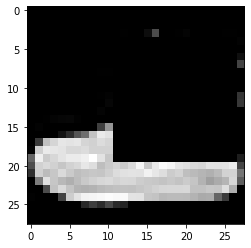

In [43]:
cut = cutout(X_train[0])
plt.imshow(cut, cmap='gray')